In [4]:
conda install cartopy geoplot ipyleaflet geemap

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/myenv

  added / updated specs:
    - cartopy
    - geemap
    - geoplot
    - ipyleaflet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    affine-2.4.0               |     pyhd8ed1ab_0          18 KB  conda-forge
    aws-c-auth-0.7.20          |       h5cf208e_0          89 KB  conda-forge
    aws-c-cal-0.6.12           |       h35c0bb2_0          39 KB  conda-forge
    aws-c-common-0.9.17        |       h03532ee_0         201 KB  conda-forge
    aws-c-compression-0.2.18   |       h35c0bb2_4          18 KB  conda-forge
    aws-c-event-stream-0.4.2   |      h7d5773a_10          46 KB  conda-forge
    aws-c-http-0.8.1           |      h00faecf_13         148 KB  conda-forge
    aws-c-io-0.14.8            |       h6dd71cf_0         135 KB  cond

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Generate random latitude values between -90 and 90 (max)
lats = np.random.uniform(low=-37, high=-38, size=100)

# Generate random longitude values between -180 and 180 (max)
lons = np.random.uniform(low=-122, high=-123, size=100)

In [35]:
# Generate random data values between 0 and 100
data = np.random.uniform(low=0, high=100, size=100)


In [36]:
# Save the arrays to .npy files
np.save('lats.npy', lats)
np.save('lons.npy', lons)
np.save('data.npy', data)

In [37]:
lats = np.load('lats.npy')
lons = np.load('lons.npy')
data = np.load('data.npy')

In [19]:
import pandas as pd

In [39]:
data_array = np.load('data.npy')
data = pd.DataFrame(data_array)

lats_array = np.load('lats.npy')
lats = pd.DataFrame(lats_array)

data_lons = np.load('lons.npy')
lons = pd.DataFrame(data_lons)

lats

0
0  -37.914347
1  -37.489284
2  -37.131570
3  -37.479134
4  -37.989611
..        ...
95 -37.726144
96 -37.261973
97 -37.218171
98 -37.630832
99 -37.763780

[100 rows x 1 columns]

# 1. Cartopy

In [16]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

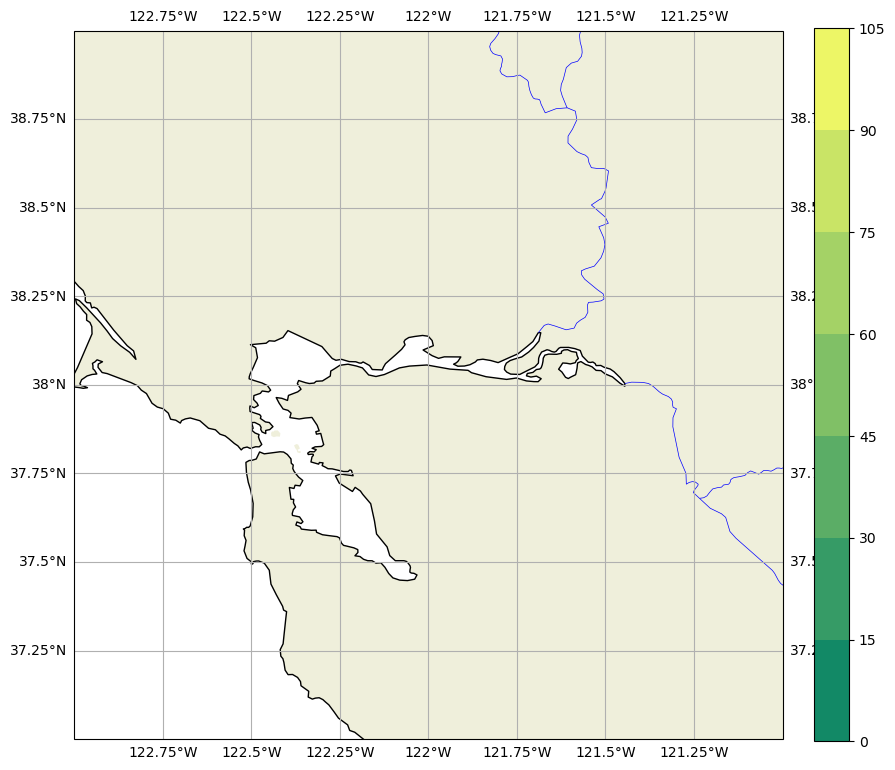

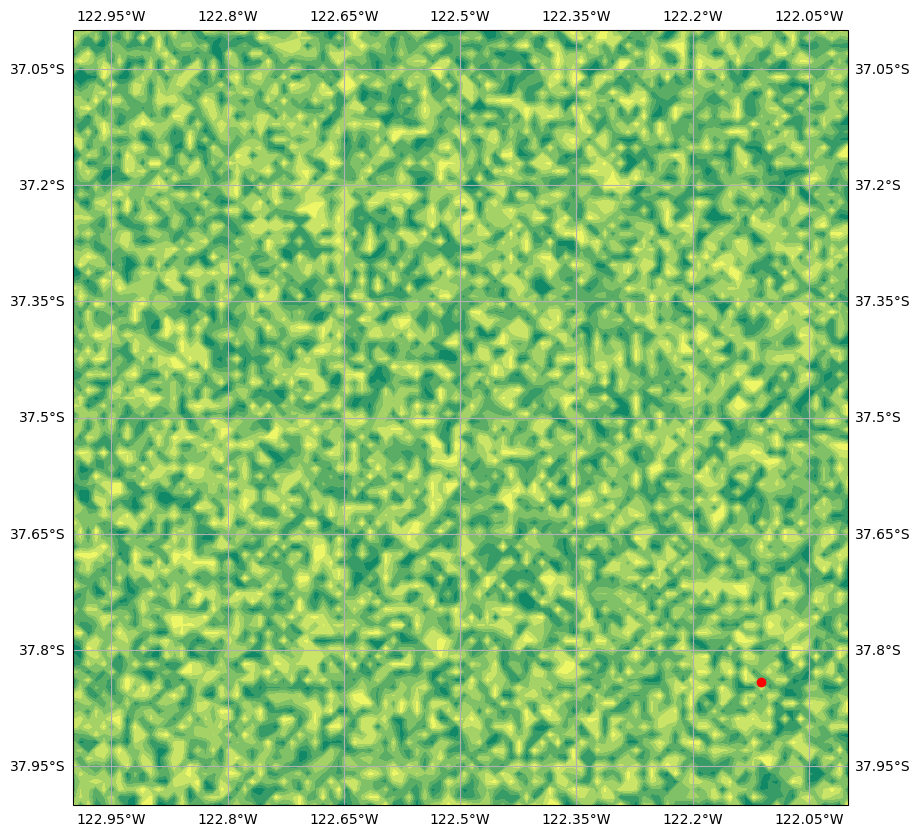

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Generate random latitude values between -38 and -37
lats = np.random.uniform(low=-38, high=-37, size=100)

# Generate random longitude values between -123 and -122
lons = np.random.uniform(low=-123, high=-122, size=100)

# Generate random data values (assuming same length as lats and lons)
data = np.random.uniform(low=0, high=100, size=(100, 100))  # Assuming a 2D grid for contour plot

# Define projection
proj = ccrs.PlateCarree()

# Define specific point
lon, lat = -122.1119, -37.8414

# Create figure and axes
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(10, 20))

# Set extent of the plot
ax.set_extent([-123, -121, 37, 39], crs=ccrs.PlateCarree())

# Plot contourf
plt.contourf(lons, lats, data, transform=ccrs.PlateCarree(), cmap='summer')

# Add features to the map
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=0.5)

# Add states and provinces
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural', name='admin_1_states_provinces_lines',
    scale='10m', facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', zorder=10, linestyle='-', linewidth=0.5)

# Add gridlines
ax.gridlines(draw_labels=True)

# Plot specific point
ax.plot(lon, lat, 'o', markersize=6, color='red', transform=ccrs.Geodetic())

plt.colorbar(contour, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)

# Create figure and axes
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(10, 20))

# Set extent of the plot
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot contourf
contour = ax.contourf(lon_grid, lat_grid, data, transform=ccrs.PlateCarree(), cmap='summer')


# Add features to the map
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=0.5)

# Add states and provinces
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural', name='admin_1_states_provinces_lines',
    scale='10m', facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', zorder=10, linestyle='-', linewidth=0.5)

# Add gridlines
ax.gridlines(draw_labels=True)

# Plot specific point
ax.plot(lon, lat, 'o', markersize=6, color='red', transform=ccrs.Geodetic())

# Show plot
plt.show()


#2. Folium

In [49]:
import folium

In [50]:
import geopandas as gpd
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [51]:
df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df

/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_33053/2265366195.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [56]:
map = folium.Map(zoom_start=14, tiles="Cartodb Positron")
gdf_json = df.to_json()

folium.GeoJson(gdf_json).add_to(map)
map

# 3. Plotly

In [57]:
import plotly.express as px

fig = px.choropleth(df, locations='iso_a3', hover_name='name', color='gdp_md_est',
                    projection='natural earth')
fig.show()

# 4. ipyleaflet

In [59]:
conda install xarray

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/myenv

  added / updated specs:
    - xarray


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xarray-2024.5.0            |     pyhd8ed1ab_0         768 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         768 KB

The following NEW packages will be INSTALLED:

  xarray             conda-forge/noarch::xarray-2024.5.0-pyhd8ed1ab_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [60]:
import xarray as xr

data = xr.load_dataset('era5.nc')
data

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ulrike_imac_air/projects/code/clones/era5.nc'

In [61]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, LayersControl
from ipyleaflet.velocity import Velocity

m = Map(basemap=basemaps.CartoDB.DarkMatter,interpolation='nearest',
    center=(45, 2), zoom=5)
wind = Velocity(data=data.sel(time='2021-01-01T00:00:00.000000000'),
                zonal_speed='u10',
                meridional_speed='v10',
                latitude_dimension='latitude',
                longitude_dimension='longitude',
                velocity_scale=0.01,
                max_velocity=20)
m.add(wind)
m.add_control(LayersControl())
m

AttributeError: 'numpy.ndarray' object has no attribute 'sel'

In [62]:
from ipyleaflet import Map, TileLayer, basemaps
from ipyleaflet.velocity import Velocity
import xarray as xr
import os
import requests

if not os.path.exists('wind-global.nc'):
  url = 'https://github.com/benbovy/xvelmap/raw/master/notebooks/wind-global.nc'
  r = requests.get(url)
  wind_data = r.content
  with open('wind-global.nc', 'wb') as f:
      f.write(wind_data)

m = Map(center=(45, 2), zoom=4, interpolation='nearest', basemap=basemaps.CartoDB.DarkMatter)

ds = xr.open_dataset('wind-global.nc')

wind = Velocity(data=ds,
                zonal_speed='u_wind',
                meridional_speed='v_wind',
                latitude_dimension='lat',
                longitude_dimension='lon',
                velocity_scale=0.01,
                max_velocity=20)
m.add(wind)

m

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

# 5. Geemap

In [63]:
import geemap
Map = geemap.Map()
Map.add_basemap("Esri.WorldImagery")
Map.add_basemap("OpenTopoMap")
Map

In [1]:
import ee
radius = 1250
point=ee.Geometry.Point([19.9, 60.2])
roi = point.buffer(radius)
DW = ee.ImageCollection("GOOGLE/DYNAMICWORLD/V1")\
                  .filterDate(start = '2022-07-08', end='2022-08-30')\
                  .filterBounds(roi)
DW_list = DW.toList(DW.size())

EEException: Earth Engine client library not initialized. Run `ee.Initialize()`

In [2]:
m = geemap.Map(center=[60.2, 19.9], zoom=14)
m.add_basemap('HYBRID')
viz_params = {'bands':'label', 'min':0, 'max':8,
'palette':['419bdf',
    '397d49',
    '88b053',
    '7a87c6',
    'e49635',
    'dfc35a',
    'c4281b',
    'a59b8f',
    'b39fe1']}
m.add_ee_layer(ee.Image(DW_list.get(9)), viz_params)
m.add_legend(title="Dynamic World Land Cover", builtin_legend='Dynamic_World')
display(m)

NameError: name 'geemap' is not defined

# RidgeMap

In [3]:
conda install ridge_map mplcyberpunk

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - ridge_map
  - mplcyberpunk

Current channels:

  - https://conda.anaconda.org/conda-forge
  - defaults

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
from  ridge_map import FontManager, RidgeMap
import ridge_map as rm
import mplcyberpunk
import matplotlib.font_manager as fm

plt.style.use("cyberpunk")
plt.rcParams["figure.figsize"] = (16,9)

fm = FontManager('https://github.com/google/fonts/blob/main/ofl/arbutusslab/ArbutusSlab-Regular.ttf?raw=true')

r = RidgeMap(bbox=(-15, 32, 45,90), font=fm.prop) #creating a map

values =r.get_elevation_data(num_lines=200) #getting elevation data
values = r.preprocess(values=values, #setting hypoparameters
   water_ntile=70,
   vertical_ratio=40,
   lake_flatness=3)

r.plot_map(values, label="Europe", label_x=0.4,label_y=-0.05, label_size=60, line_color=plt.get_cmap('inferno'), background_color="#212946")
mplcyberpunk.add_glow_effects() #adding glowing

ModuleNotFoundError: No module named 'ridge_map'